## Get Coin information

In [10]:
_ = !pip3 install yfinance
_ = !pip install pandas
_ = !pip install seaborn
import pandas as pd

In [2]:
#get RVN price from yahoo finance

import pandas as pd

#Download information from api and store in a dataframe
# ==============================================================================
from datetime import datetime
import yfinance as yf

# Download historical data for required stocks
stocks = ["RVN-USD"]
start = '2020-01-01'
end = datetime.now()
data = yf.download(stocks, start=start, end=end)
df = data.copy()


[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2020-01-01  0.022923  0.023370  0.022544  0.022726   0.022726   6226483
2020-01-02  0.022710  0.023120  0.021900  0.023043   0.023043   9982543
2020-01-03  0.023002  0.023258  0.021915  0.023056   0.023056  12960992
2020-01-04  0.023046  0.023350  0.022695  0.023131   0.023131   5319429
2020-01-05  0.023100  0.023639  0.023072  0.023305   0.023305   5985140

In [4]:
#group by ticker and date
# ==============================================================================
# df['Adj Close']
# df['Volume']
# df.axes
# df.keys()
df[['Adj Close', 'Volume']].head()

Adj Close    Volume
Date                           
2020-01-01   0.022726   6226483
2020-01-02   0.023043   9982543
2020-01-03   0.023056  12960992
2020-01-04   0.023131   5319429
2020-01-05   0.023305   5985140

Text(0, 0.5, 'Adj Close Price USD ($)')

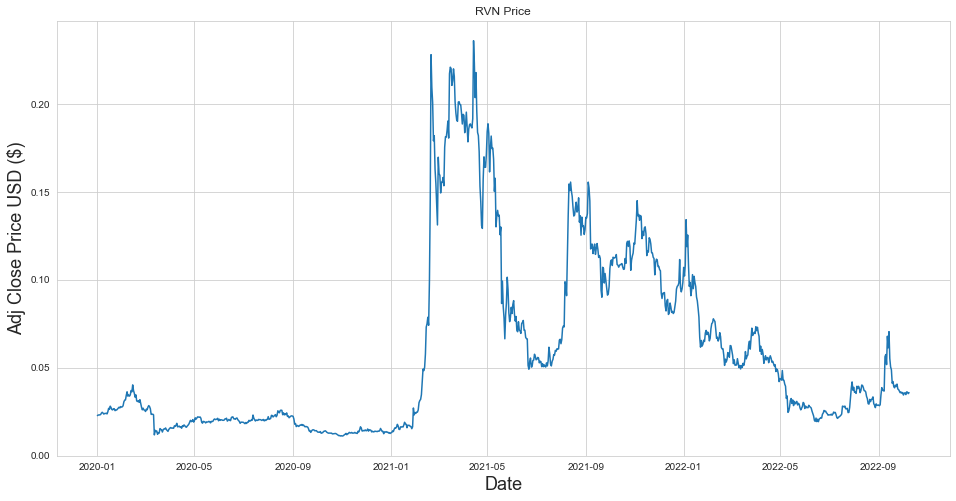

In [5]:
#plot line chart of RVN price
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('RVN Price')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)

13459 mh -> 2500 rvn (1 bloque)

1 rvn -> 0.050548 usd


datos de entrada

minero 1:
- hashrate
93.13 mh/s + 46 mh/s = 139.13 mh/s | 180 + 98 = 278 mh/s
coin: RVN
estimated profit: 1.3283 USD | 25.55011044 RVN
rel: 1.3283 / 278 = 0.00477 usd/mh

minero 2:
- hashrate
237.5 mh/s
coin: ETC
estimated profit: 0.5797 USD | 0.01699971 ETC
rel: 0.5797 / 237.5 = 0.00243 usd/mh

minero 3:
- hashrate
172.8 mh/s
coin: UBQ
estimated profit: 3.1660 USD | 0.00016028 BTC
rel: 3.166 / 172.8 = 0.0183 usd/mh

estimacion1 -> 780 * 0.0183 = 14.34 usd/mh
estimacion2 -> 780 * 0.00243 = 1.88 usd/mh
estimacion3 -> 410 * 0.00477 = 1.96 usd/mh

In [11]:
#constanst

# ==============================================================================
#electricity cost
electricity_cost = 2.19 #$/kWh
monthly_cost = 30 * electricity_cost


In [51]:
(800 / 13459 ) * 0.050548 * 2500


7.511405007801471

In [53]:
800 / pw * price * block

7.511405007801471

In [6]:
import pandas as pd

base = pd.read_csv('../data/base_coins.csv', index_col=0)
base.head()


coin  pot_w pot_mh  horas vol_gen          price profit  \
fecha                                                                
09/07/2021  RVN    160     22     24  41,159   0,1069025001    4,4   
10/08/2021  RVN    300     93     24    74,5  0,02483221477   1,85   
18/09/2022  RVN   4960    829     24  158,65  0,04689568232   7,44   
18/09/2022  RVN    857    164     24   25,38  0,04728132388    1,2   
18/09/2022  UBQ    530  172,5     24   21,92  0,03239051095   0,71   

               gen_index  
fecha                     
09/07/2021      1,870863  
10/08/2021  0,8010752688  
18/09/2022  0,1913751508  
18/09/2022  0,1547560976  
18/09/2022  0,1270724638

In [7]:
ds = base[base['coin'] == 'RVN'].copy()
ds.head(2)


coin  pot_w pot_mh  horas vol_gen          price profit  \
fecha                                                                
09/07/2021  RVN    160     22     24  41,159   0,1069025001    4,4   
10/08/2021  RVN    300     93     24    74,5  0,02483221477   1,85   

               gen_index  
fecha                     
09/07/2021      1,870863  
10/08/2021  0,8010752688

In [8]:
#convert str , to float
ds = base[base['coin'] == 'RVN'].copy()
ds['gen_index'] = ds['gen_index'].str.replace(',', '.').astype(float)
ds['pot_mh'] = ds['pot_mh'].str.replace(',', '.').astype(float)
ds[['pot_mh','gen_index']].mean()


pot_mh       424.186667
gen_index      0.390260
dtype: float64

In [9]:
#filter gen_index less than 1
ds = ds[ds['gen_index']<1]

In [12]:
# example
# ==============================================================================
print('RVN price: ', df['Adj Close'][-1])
print('potencia MH by day: ', ds['pot_mh'].mean())
print('gen_index: ', ds['gen_index'].min())

print('profitability by day: ', (ds['pot_mh'].mean() * ds['gen_index'].min( ) * df['Adj Close'][-1])-electricity_cost)
print('profitability by month: ', (ds['pot_mh'].mean() * ds['gen_index'].min( ) * df['Adj Close'][-1] * 30)-monthly_cost)


RVN price:  0.03577800095081329
potencia MH by day:  460.7490909090909
gen_index:  0.1547560976
profitability by day:  0.3611049655981553
profitability by month:  10.833148967944652


In [13]:
df['profit_day_min'] = (ds['pot_mh'].mean() * ds['gen_index'].min( ) * df['Adj Close'])-electricity_cost
df['profit_day_max'] = (ds['pot_mh'].mean() * ds['gen_index'].max( ) * df['Adj Close'])-electricity_cost
df['profit_day_mean'] = (ds['pot_mh'].mean() * ds['gen_index'].mean( ) * df['Adj Close'])-electricity_cost



In [32]:

dj = pd.DataFrame()

#first row
dj


Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: [price, profitability]
Index: []
      price profitability    profit
0  0.011097           NaN -1.398742
1  0.021097           NaN -0.685705
2  0.031097           NaN  0.027332
3  0.041097           NaN  0.740369
4  0.051097           NaN  1.453407


Text(0.05109699998050929, 1.4534067559183441, '0.05109699998050929')

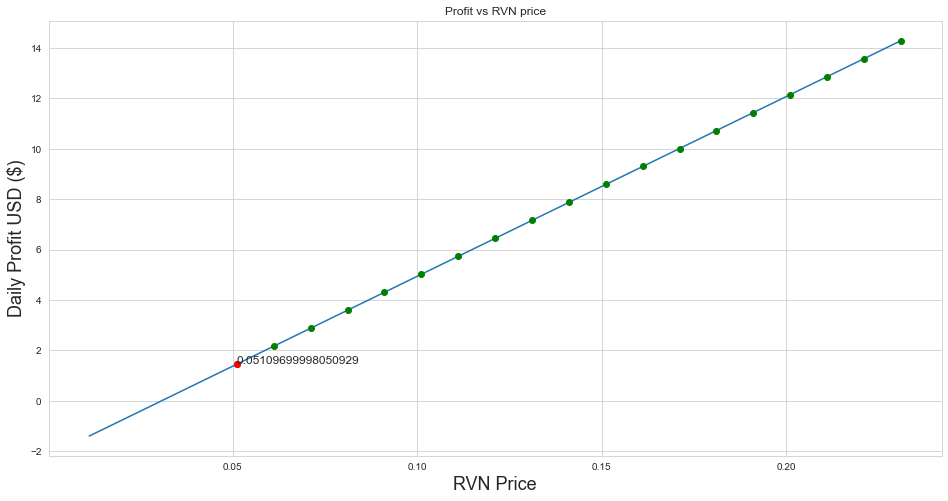

In [41]:
#make a function to calculate the price to get a profit greater than 15 usd per day with a 800 mh/s rig
# ==============================================================================
import numpy as np


def get_price_profitability(pot_mh, gen_index, price, electricity_cost):
    return (pot_mh * gen_index * price)-electricity_cost

#example
# ==============================================================================
#optimal price to get a profit greater than 15 usd per day with a 400 mh/s rig
dj = pd.DataFrame(columns=['price', 'profitability'])
print(dj)
j = 0
for i in np.arange(df['Adj Close'].min(), df['Adj Close'].max(), 0.01):
    dj.loc[j,'price'] = i
    dj.loc[j,'profit'] = get_price_profitability(ds['pot_mh'].mean(), ds['gen_index'].min(), i, electricity_cost)
    j += 1

print(dj.head())
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('Profit vs RVN price')
plt.plot(dj['price'], dj['profit'])
plt.xlabel('RVN Price', fontsize=18)
plt.ylabel('Daily Profit USD ($)', fontsize=18)
#add markers to the plot
plt.plot(dj['price'][dj['profit']>1], dj['profit'][dj['profit']>1], 'o', color='green')
plt.plot(dj['price'][dj['profit']>1].min(), dj['profit'][dj['profit']>1].min(), 'o', color='red')
#add price value to the plot
plt.text(dj['price'][dj['profit']>1].min(), dj['profit'][dj['profit']>1].min(), dj['price'][dj['profit']>1].min(), fontsize=12)





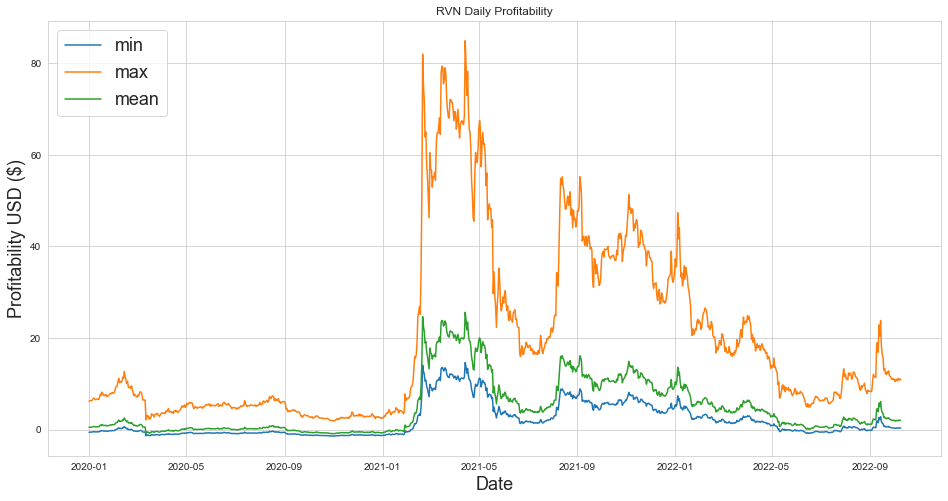

In [15]:
#plot line chart of profit min and max
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('RVN Daily Profitability')
plt.plot(df['profit_day_min'], label='min')
plt.plot(df['profit_day_max'], label='max')
plt.plot(df['profit_day_mean'], label='mean')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Profitability USD ($)', fontsize=18)
plt.legend(loc='upper left', fontsize=18)
